<a href="https://colab.research.google.com/github/jrhudlstn/data/blob/master/460_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OPEN QUESTIONS 
* NUMBER OF BEDS AVAILABLE
* NUMBER OF ICU UNITS AVAILABLE
* NUMBER OF NURSES DOCTORS AVAILABLE
* CONSTRAINTS - DOCTORS IN EACH HOSPITAL, ICU BEDS, DISTANCE
* HEALTH EQUIPMENT AVAILABLE
* CLOSENESS TO THE HOSPITAL (?)
* WHAT ELSE NEEDS TO BE DEFINED?
* IS INSURANCE PART OF CONSIDERATION? 
  * If we are limiting the scope to ICU, I don't think this is a major factor, as almost all of them will be confirmed cases, and their medical bills should be covered. If this assumption is true, we can safely assume that medical costs wiil not be a deterrent.

-- Also, WRT the number of doctors we have found, I don't think it's a comprehensive list of doctors available in NYC.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick
import datetime


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## IMPORT DATA SOURCE
* https://github.com/thecityny/covid-19-nyc-data
* https://github.com/nychealth/coronavirus-data

In [ ]:
url = ['https://raw.githubusercontent.com/thecityny/covid-19-nyc-data/master/age.csv',
       'https://raw.githubusercontent.com/thecityny/covid-19-nyc-data/master/beds.csv',
       'https://raw.githubusercontent.com/thecityny/covid-19-nyc-data/master/borough.csv',
       'https://raw.githubusercontent.com/thecityny/covid-19-nyc-data/master/gender.csv',
       'https://raw.githubusercontent.com/thecityny/covid-19-nyc-data/master/hospitalized.csv',
       'https://raw.githubusercontent.com/thecityny/covid-19-nyc-data/master/state.csv',
       'https://raw.githubusercontent.com/thecityny/covid-19-nyc-data/master/zcta.csv',
       'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv',
       'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/tests-by-zcta.csv',
       'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/syndromic_data.csv',
       'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/by-boro.csv',
       'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/boro/boroughs-case-hosp-death.csv']
       
age = pd.read_csv(url[0], error_bad_lines=False) ## COVID BY AGE
beds = pd.read_csv(url[1], error_bad_lines=False)
borough = pd.read_csv(url[2], error_bad_lines=False)
gender = pd.read_csv(url[3], error_bad_lines=False)
hospital = pd.read_csv(url[4], error_bad_lines=False)
state = pd.read_csv(url[5], error_bad_lines=False)
zcta = pd.read_csv(url[6], error_bad_lines=False)
case_by_zip = pd.read_csv(url[7], error_bad_lines=False)
test_by_zip = pd.read_csv(url[8], error_bad_lines=False)
admission = pd.read_csv(url[9], error_bad_lines=False)
rate_by_boro = pd.read_csv(url[10], error_bad_lines=False)
case_by_boro = pd.read_csv(url[11], error_bad_lines=False)

### CASES OVER TIME

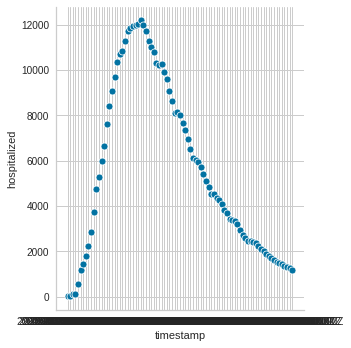

In [ ]:
hospital.tail(5)
sns.relplot(x = 'timestamp', y = 'hospitalized', data = hospital)

In [ ]:
age.head()
age['timestamp'] = pd.to_datetime(age['timestamp'])
#age['timestamp'] = age['timestamp'].dt.strftime("%m/%d/%y")
age.index = age['timestamp'] 
age.drop('timestamp', inplace = True, axis = 1)

In [ ]:
age_bydate = age.groupby('type').resample('D').sum()
age_bydate.reset_index(inplace = True)
age_bydate['timestamp'] = age_bydate['timestamp'].dt.strftime("%m/%d/%y")

In [ ]:
age_bydate.sample(10)

,type,timestamp,ages_0_17,ages_18_44,ages_45_64,ages_65_74,ages_75_older,unknown,total
14,cases,04/05/20,2259,50377,45829,16357,13627,273,128722
119,deaths-no-underlying,04/03/20,0,16,30,2,6,0,54
212,deaths-pending-underlying,05/15/20,0,111,458,795,1787,2,3153
318,ever-hospitalized,04/12/20,190,4304,10182,6147,6853,0,27676
142,deaths-no-underlying,04/26/20,0,10,50,5,1,0,66
256,deaths-underlying,04/04/20,3,165,760,746,1145,0,2819
129,deaths-no-underlying,04/13/20,0,24,57,26,26,0,133
109,deaths,05/14/20,8,610,3449,3841,7511,3,15422
12,cases,04/03/20,1921,43855,38671,13629,10920,239,109235
4,cases,03/26/20,965,19763,15314,5098,3761,84,44985


In [ ]:
ages_modified=age_bydate
ages_modified.drop('timestamp',axis=1)
categories=ages_modified.type.unique()


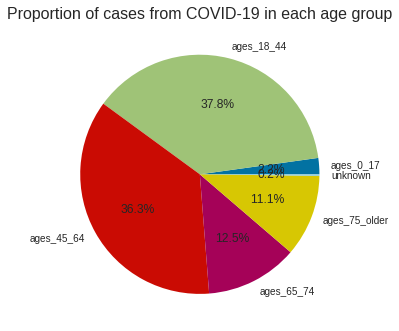

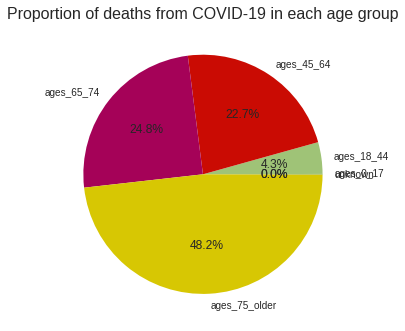

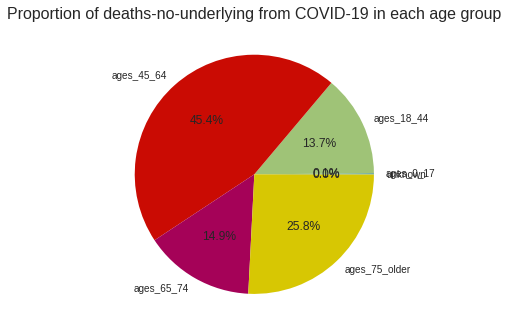

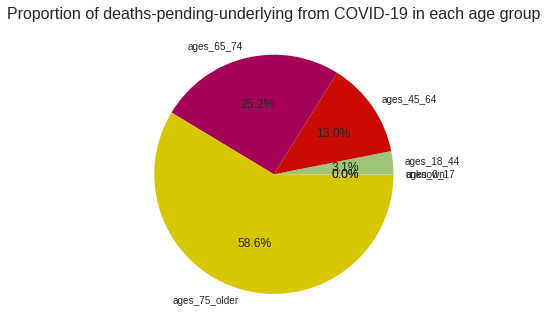

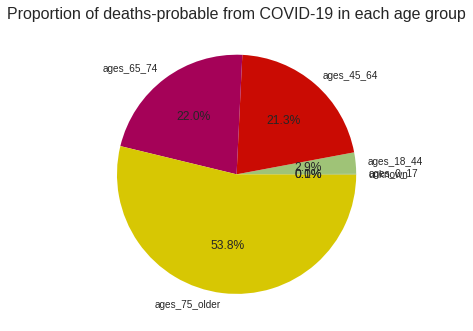

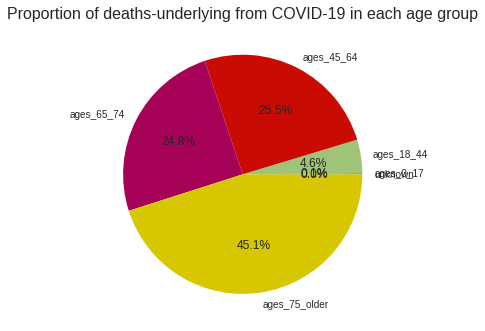

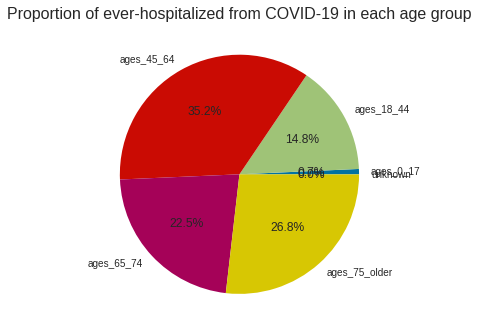

In [ ]:
for category in categories:
  new_ages = ages_modified[ages_modified['type']==category]
  first = new_ages['ages_0_17'].sum()
  second = new_ages['ages_18_44'].sum()
  third = new_ages['ages_45_64'].sum()
  fourth = new_ages['ages_65_74'].sum()
  fifth = new_ages['ages_75_older'].sum()
  other = new_ages['unknown'].sum()
  total = [first,second,third,fourth,fifth,other]
  label = ['ages_0_17','ages_18_44','ages_45_64','ages_65_74','ages_75_older','unknown']
  plt.pie(total,labels=label,autopct='%1.1f%%')
  x="Proportion of "+category+" from COVID-19 in each age group"
  plt.title(x, fontsize=16)
  plt.show()


<function matplotlib.pyplot.show>

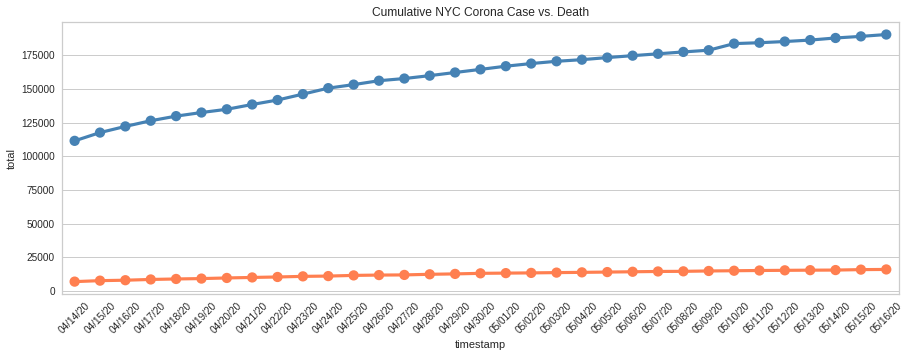

In [ ]:
# NOT SURE WHY THE DROP HAPPENS - AS FAR AS I CAN SEE THERE ARE ONLY 1 REPORT PER DATE FROM ARPIL. PROBABLY THEY REPORTED TWICE, SO DOES NOT MAKE SENSE TO SUM. 
plt.figure(figsize=(15, 5))
sns.pointplot(x = 'timestamp', y = 'total' , data = age_bydate[(age_bydate['type']=='cases') & (age_bydate['timestamp'] >= '04/14/20')], color='steelblue')
sns.pointplot(x = 'timestamp', y = 'total' , data = age_bydate[(age_bydate['type']=='deaths') & (age_bydate['timestamp'] >= '04/14/20')], color='coral')
plt.xticks(rotation = 45)
plt.title('Cumulative NYC Corona Case vs. Death')
plt.show

### CASE BY ZIP CODE


* Count of confirmed cases
* Rate of confirmed cases per 100,000 people by ZCTA
* Population denominators for ZCTAs derived from intercensal estimates by the Bureau of Epidemiology Services (see “Rates per 100,000 people” for more details)
* Count of confirmed deaths
* Percentage of people ever tested for COVID-19 who tested positive
* Rate of confirmed deaths per 100,000 people by ZCTA


In [ ]:
case_by_zip.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,372,1578.74,23563.03,21,89.12,14.98,2484
1,10002,Chinatown/Lower East Side,Manhattan,1061,1382.31,76755.41,149,194.12,20.26,5236
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,451,838.26,53801.62,33,61.34,11.74,3843
3,10004,Financial District,Manhattan,31,849.17,3650.61,1,27.39,11.44,271
4,10005,Financial District,Manhattan,62,738.44,8396.11,2,23.82,10.49,591


In [ ]:
case_zip_group_sum = case_by_zip.groupby('BOROUGH_GROUP').sum().reset_index().drop(['MODIFIED_ZCTA','COVID_CASE_RATE','COVID_DEATH_RATE','PERCENT_POSITIVE'], axis = 1)
case_zip_group_mean = case_by_zip.groupby('BOROUGH_GROUP').mean().reset_index().drop(['BOROUGH_GROUP','MODIFIED_ZCTA','COVID_CASE_COUNT','POP_DENOMINATOR','COVID_DEATH_COUNT'], axis = 1)

#### Total Cases so far - need to confirm current counts
#### Need to calculate current COVID CASE RATE
#### Need to calculate future percent positive



In [ ]:
case_zip_group = pd.concat([case_zip_group_sum, case_zip_group_mean], axis=1).reindex(case_zip_group_sum.index)
case_zip_group

,BOROUGH_GROUP,COVID_CASE_COUNT,POP_DENOMINATOR,COVID_DEATH_COUNT,TOTAL_COVID_TESTS,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,Bronx,45023,1434692.65,3621,161030,3151.142800,245.457600,27.522000,6441.200000
1,Brooklyn,54033,2582829.99,5190,236470,2061.754865,205.675135,22.545135,6391.081081
2,Manhattan,24394,1611943.49,2320,144415,1416.409318,127.868864,15.670909,3282.159091
3,Queens,61217,2288709.82,5182,224452,2592.678814,205.323898,25.974576,3804.271186
4,Staten Island,13474,476179.01,842,52504,2844.129167,167.073333,25.985000,4375.333333


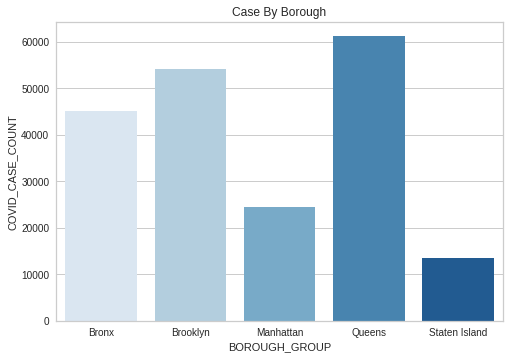

In [ ]:
sns.barplot(x = 'BOROUGH_GROUP', y = 'COVID_CASE_COUNT', data = case_by_zip.groupby('BOROUGH_GROUP').sum().reset_index(), palette = 'Blues')
plt.title('Case By Borough')
plt.show()

This file contains counts and rates of confirmed cases, hospitalizations, and deaths, by NYC borough of residence. Rates are:

Cumulative since the start of the outbreak
Per 100,000 people by borough of residence
Note that sum of counts in this file may not match values in Citywide tables because of records with missing geographic information. This file does not currently contain information on probable deaths.

In [ ]:
case_by_boro.tail(5)

,DATE_OF_INTEREST,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT
94,06/02/2020,118,27,4,75,24,6,53,20,6,122,34,9,29,4,1
95,06/03/2020,83,28,6,66,17,7,57,22,4,76,24,2,18,2,2
96,06/04/2020,53,22,2,32,24,3,20,11,3,42,9,4,5,0,1
97,06/05/2020,27,1,0,17,2,1,15,1,0,25,4,2,0,0,0
98,06/06/2020,2,0,0,3,0,0,4,0,0,3,0,0,0,0,0


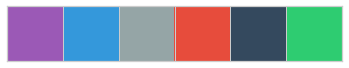

In [ ]:

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

<function matplotlib.pyplot.show>

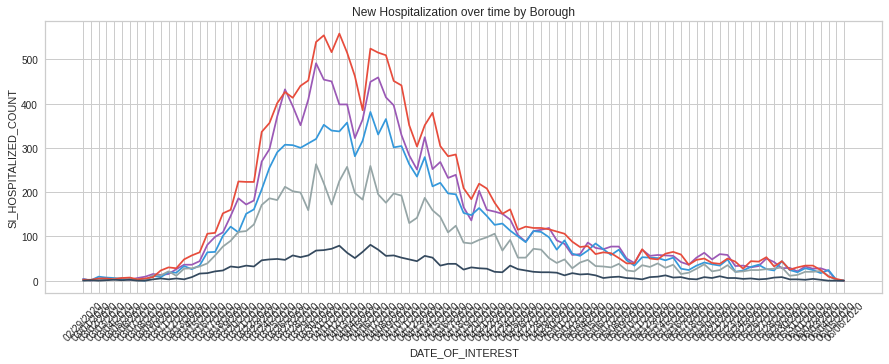

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'BK_HOSPITALIZED_COUNT' , data = case_by_boro, color=flatui[0])
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'BX_HOSPITALIZED_COUNT' , data = case_by_boro, color=flatui[1])
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'MN_HOSPITALIZED_COUNT' , data = case_by_boro, color=flatui[2])
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'QN_HOSPITALIZED_COUNT' , data = case_by_boro, color=flatui[3])
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'SI_HOSPITALIZED_COUNT' , data = case_by_boro, color=flatui[4])
plt.xticks(rotation = 45)
plt.title('New Hospitalization over time by Borough')
plt.show

<function matplotlib.pyplot.show>

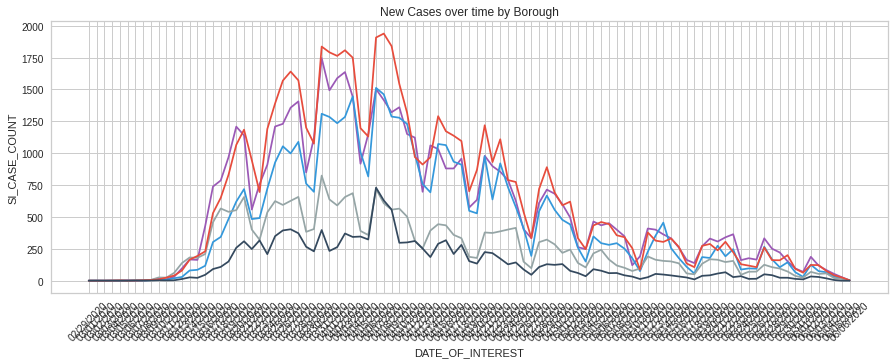

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'BK_CASE_COUNT' , data = case_by_boro, color=flatui[0])
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'BX_CASE_COUNT' , data = case_by_boro, color=flatui[1])
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'MN_CASE_COUNT' , data = case_by_boro, color=flatui[2])
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'QN_CASE_COUNT' , data = case_by_boro, color=flatui[3])
sns.lineplot(x = 'DATE_OF_INTEREST', y = 'SI_CASE_COUNT' , data = case_by_boro, color=flatui[4])
plt.xticks(rotation = 45)
plt.title('New Cases over time by Borough')
plt.show

# CONSTRAINTS

SOURCE: Marc Lipsitch, Harvard epidemiologist.

Adults hospitalized
Assumes hospitalization rate of 19% for those under 65 and 28.5% for those 65+.

Adults needing I.C.U. care
Assumes 19% I.C.U. rate for those hospitalized under 65 and 28.5% for those 65+.

**CONSTRAINT 1: Patients**

In [ ]:
#VOX.com article as of 3/27
#There are about 4700 covid-related hospitalization 
#850 ICU hospitalization 

In [ ]:
MN_data = case_by_boro[['DATE_OF_INTEREST','MN_CASE_COUNT','MN_HOSPITALIZED_COUNT','MN_DEATH_COUNT']]
BK_data = case_by_boro[['DATE_OF_INTEREST','BK_CASE_COUNT','BK_HOSPITALIZED_COUNT','BK_DEATH_COUNT']]
BX_data = case_by_boro[['DATE_OF_INTEREST','BX_CASE_COUNT','BX_HOSPITALIZED_COUNT','BX_DEATH_COUNT']]
QN_data = case_by_boro[['DATE_OF_INTEREST','QN_CASE_COUNT','QN_HOSPITALIZED_COUNT','QN_DEATH_COUNT']]
SI_data = case_by_boro[['DATE_OF_INTEREST','SI_CASE_COUNT','SI_HOSPITALIZED_COUNT','SI_DEATH_COUNT']]

In [ ]:
date_list = list()
in_hospital_list = list()

for i in range(len(MN_data)):
  if i <= 12: 
    in_hospital = sum(MN_data['MN_HOSPITALIZED_COUNT'][:i+1])+ - sum(MN_data['MN_DEATH_COUNT'][:i+1])
    date = MN_data['DATE_OF_INTEREST'][i]
    date_list.append(date)  
    in_hospital_list.append(in_hospital)
  else: 
    in_hospital = sum(MN_data['MN_HOSPITALIZED_COUNT'][:i+1]) - sum(MN_data['MN_HOSPITALIZED_COUNT'][:i-13])
    date = MN_data['DATE_OF_INTEREST'][i]
    date_list.append(date)
    in_hospital_list.append(in_hospital)   
  
icu_hospital_list = list(np.around(np.array(in_hospital_list)*0.3))

MN_hospital_dict = {'Date': date_list, 'MN_In_Hospital':in_hospital_list, 'MN_In_ICU':icu_hospital_list}
MN_hospital = pd.DataFrame(MN_hospital_dict)
MN_hospital.tail(10)

,Date,MN_In_Hospital,MN_In_ICU
92,05/31/2020,338,101.0
93,06/01/2020,331,99.0
94,06/02/2020,315,94.0
95,06/03/2020,317,95.0
96,06/04/2020,308,92.0
97,06/05/2020,282,85.0
98,06/06/2020,269,81.0
99,06/07/2020,253,76.0
100,06/08/2020,230,69.0
101,06/09/2020,206,62.0


In [ ]:
date_list = list()
in_hospital_list = list()

for i in range(len(BK_data)):
  if i <= 12: 
    in_hospital = sum(BK_data['BK_HOSPITALIZED_COUNT'][:i+1])
    date = BK_data['DATE_OF_INTEREST'][i]
    date_list.append(date)  
    in_hospital_list.append(in_hospital)
  else: 
    in_hospital = sum(BK_data['BK_HOSPITALIZED_COUNT'][:i+1]) - sum(BK_data['BK_HOSPITALIZED_COUNT'][:i-13])
    date = BK_data['DATE_OF_INTEREST'][i]
    date_list.append(date)
    in_hospital_list.append(in_hospital)   
  
icu_hospital_list = list(np.around(np.array(in_hospital_list)*0.25))

BK_hospital_dict = {'Date': date_list, 'BK_In_Hospital':in_hospital_list, 'BK_In_ICU':icu_hospital_list}
BK_hospital = pd.DataFrame(BK_hospital_dict)
BK_hospital.tail()

,Date,BK_In_Hospital,BK_In_ICU
97,06/05/2020,447,112.0
98,06/06/2020,422,106.0
99,06/07/2020,394,98.0
100,06/08/2020,366,92.0
101,06/09/2020,333,83.0


In [ ]:
date_list = list()
in_hospital_list = list()

for i in range(len(BX_data)):
  if i <= 12: 
    in_hospital = sum(BX_data['BX_HOSPITALIZED_COUNT'][:i+1])
    date = BX_data['DATE_OF_INTEREST'][i]
    date_list.append(date)  
    in_hospital_list.append(in_hospital)
  else: 
    in_hospital = sum(BX_data['BX_HOSPITALIZED_COUNT'][:i+1]) - sum(BX_data['BX_HOSPITALIZED_COUNT'][:i-13])
    date = BX_data['DATE_OF_INTEREST'][i]
    date_list.append(date)
    in_hospital_list.append(in_hospital)   
  
icu_hospital_list = list(np.around(np.array(in_hospital_list)*0.3))

BX_hospital_dict = {'Date': date_list, 'BX_In_Hospital':in_hospital_list, 'BX_In_ICU':icu_hospital_list}
BX_hospital = pd.DataFrame(BX_hospital_dict)
BX_hospital.tail()

,Date,BX_In_Hospital,BX_In_ICU
97,06/05/2020,362,109.0
98,06/06/2020,354,106.0
99,06/07/2020,344,103.0
100,06/08/2020,320,96.0
101,06/09/2020,282,85.0


In [ ]:
date_list = list()
in_hospital_list = list()

for i in range(len(QN_data)):
  if i <= 12: 
    in_hospital = sum(QN_data['QN_HOSPITALIZED_COUNT'][:i+1])
    date = QN_data['DATE_OF_INTEREST'][i]
    date_list.append(date)  
    in_hospital_list.append(in_hospital)
  else: 
    in_hospital = sum(QN_data['QN_HOSPITALIZED_COUNT'][:i+1]) - sum(QN_data['QN_HOSPITALIZED_COUNT'][:i-13])
    date = QN_data['DATE_OF_INTEREST'][i]
    date_list.append(date)
    in_hospital_list.append(in_hospital)   
  
icu_hospital_list = list(np.around(np.array(in_hospital_list)*0.25))

QN_hospital_dict = {'Date': date_list, 'QN_In_Hospital':in_hospital_list, 'QN_In_ICU':icu_hospital_list}
QN_hospital = pd.DataFrame(QN_hospital_dict)
QN_hospital.tail()

,Date,QN_In_Hospital,QN_In_ICU
97,06/05/2020,461,115.0
98,06/06/2020,426,106.0
99,06/07/2020,404,101.0
100,06/08/2020,361,90.0
101,06/09/2020,319,80.0


In [ ]:
date_list = list()
in_hospital_list = list()

for i in range(len(SI_data)):
  if i <= 12: 
    in_hospital = sum(SI_data['SI_HOSPITALIZED_COUNT'][:i+1])
    date = SI_data['DATE_OF_INTEREST'][i]
    date_list.append(date)  
    in_hospital_list.append(in_hospital)
  else: 
    in_hospital = sum(SI_data['SI_HOSPITALIZED_COUNT'][:i+1]) - sum(SI_data['SI_HOSPITALIZED_COUNT'][:i-13])
    date = SI_data['DATE_OF_INTEREST'][i]
    date_list.append(date)
    in_hospital_list.append(in_hospital)   
  
icu_hospital_list = list(np.around(np.array(in_hospital_list)*0.20))

SI_hospital_dict = {'Date': date_list, 'SI_In_Hospital':in_hospital_list, 'SI_In_ICU':icu_hospital_list}
SI_hospital = pd.DataFrame(SI_hospital_dict)
SI_hospital.tail()

,Date,SI_In_Hospital,SI_In_ICU
97,06/05/2020,55,11.0
98,06/06/2020,49,10.0
99,06/07/2020,45,9.0
100,06/08/2020,40,8.0
101,06/09/2020,37,7.0


In [ ]:
NY_Hospital = pd.concat([MN_hospital,
           BK_hospital[['BK_In_Hospital','BK_In_ICU']],\
           BX_hospital[['BX_In_Hospital','BX_In_ICU']],\
           QN_hospital[['QN_In_Hospital','QN_In_ICU']],\
           SI_hospital[['SI_In_Hospital','SI_In_ICU']]], axis = 1)

In [ ]:
### VALIDATION AGAINST VOX TOTAL HOSPITALIZATION AND ICU
print(MN_hospital[MN_hospital['Date']=='03/27/2020'])
print(round(1545/4700*100,2)) # MAKES SENSE (32.87%)
print(round(294/850*100,2)) # MAKES SENSE (34.59%)

          Date  MN_In_Hospital  MN_In_ICU
27  03/27/2020            1624      487.0
32.87
34.59


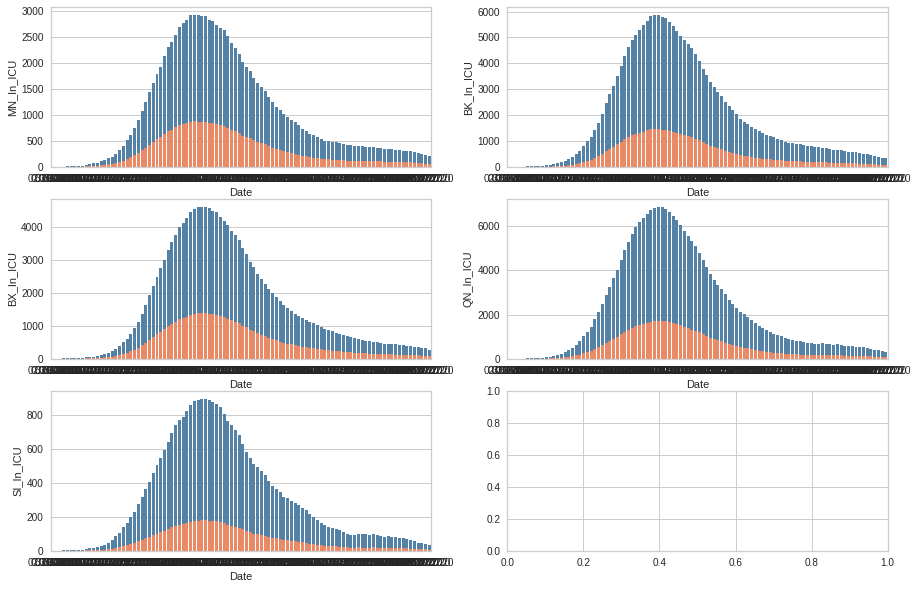

In [ ]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(15,10))

sns.barplot(x = 'Date', y = 'MN_In_Hospital', data = MN_hospital, color = 'steelblue', ax = ax1)
sns.barplot(x = 'Date', y = 'MN_In_ICU', data = MN_hospital, color = 'coral', ax = ax1)

sns.barplot(x = 'Date', y = 'BK_In_Hospital', data = BK_hospital, color = 'steelblue', ax = ax2)
sns.barplot(x = 'Date', y = 'BK_In_ICU', data = BK_hospital, color = 'coral', ax = ax2)

sns.barplot(x = 'Date', y = 'BX_In_Hospital', data = BX_hospital, color = 'steelblue', ax = ax3)
sns.barplot(x = 'Date', y = 'BX_In_ICU', data = BX_hospital, color = 'coral', ax = ax3)

sns.barplot(x = 'Date', y = 'QN_In_Hospital', data = QN_hospital, color = 'steelblue', ax = ax4)
sns.barplot(x = 'Date', y = 'QN_In_ICU', data = QN_hospital, color = 'coral', ax = ax4)

sns.barplot(x = 'Date', y = 'SI_In_Hospital', data = SI_hospital, color = 'steelblue', ax = ax5)
sns.barplot(x = 'Date', y = 'SI_In_ICU', data = SI_hospital, color = 'coral', ax = ax5)

plt.show()

**CONSTAINT 2: BEDS AVAILABLE**

https://docs.google.com/spreadsheets/d/1xAyBFTrlxSsTKQS7IDyr_Ah4JLBYj6_HX6ijKdm4fAY/edit#gid=0
-- ABOUT 50% of the total beds/ICU beds available are in NYC
* TOTAL BEDS IN MANHATTHAN 14,834	
* BRONX 4,012
* BK: 5848
* QN: 2873
* SI: 927

* COVID OCCUPIED BEDS: 4969
* TOTAL ICU 1,427
* COVID OCCUPIED ICU: 795


2,084 hospitalized
726 ICU

In [ ]:
icu_occupied_index = [x for x in NY_Hospital.iloc[-5,:][2::2].index]
icu_occupied = [x for x in NY_Hospital.iloc[-5,:][2::2]]
bed_occupied_index = [x for x in NY_Hospital.iloc[-5,:][1::2].index]
bed_occupied = [x for x in NY_Hospital.iloc[-5,:][1::2]]
hospital_occupied = pd.DataFrame([icu_occupied,bed_occupied]).T
hospital_occupied.columns = ['ICU', 'BED']
hospital_occupied['Boro'] = ['MN','BK','BX','QN','SI']
hospital_occupied['Total_by_Boro'] = [14834,5848,4012,2873,927]
hospital_occupied

,ICU,BED,Boro,Total_by_Boro
0,85.0,282.0,MN,14834
1,112.0,447.0,BK,5848
2,109.0,362.0,BX,4012
3,115.0,461.0,QN,2873
4,11.0,55.0,SI,927


In [ ]:
from itertools import chain

In [ ]:
TOTAL_ICU_by_Boro = [hospital_occupied['Total_by_Boro']/sum(hospital_occupied['Total_by_Boro'])*3110]
TOTAL_ICU_by_Boro = [round(x) for x in TOTAL_ICU_by_Boro]
TOTAL_ICU_by_Boro = list(chain.from_iterable(TOTAL_ICU_by_Boro))
hospital_occupied['Total_ICU_by_Boro'] = TOTAL_ICU_by_Boro
hospital_occupied

,ICU,BED,Boro,Total_by_Boro,Total_ICU_by_Boro
0,85.0,282.0,MN,14834,1619.0
1,112.0,447.0,BK,5848,638.0
2,109.0,362.0,BX,4012,438.0
3,115.0,461.0,QN,2873,314.0
4,11.0,55.0,SI,927,101.0


In [ ]:
basis_bed = beds[(beds['locality']=='nyc') & (beds['timestamp']=='2020-05-28T04:00:00Z')]
basis_bed['bed_ratio_NOCOVID'] = (basis_bed['total'] - basis_bed['total_available'] - sum(hospital_occupied['BED']))/basis_bed['total']
basis_bed['icu_ratio__NOCOVID'] = (basis_bed['icu'] - basis_bed['icu_available'] - sum(hospital_occupied['ICU']))/basis_bed['icu']
basis_bed = basis_bed[['total',	'total_available',	'icu',	'icu_available',	'bed_ratio_NOCOVID',	'icu_ratio__NOCOVID']]
basis_bed.reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,total,total_available,icu,icu_available,bed_ratio_NOCOVID,icu_ratio__NOCOVID
0,119,20735,5871,3110,987,0.639354,0.54373


In [ ]:
bed_28 = hospital_occupied['Total_by_Boro']*0.626863 -  hospital_occupied['BED']
bed_28 = [round(x) for x in bed_28]

icu_28 = hospital_occupied['Total_ICU_by_Boro']*0.522186 -  hospital_occupied['ICU']
icu_28 = [round(x) for x in icu_28]

hospital_occupied['Available_May28'] = bed_28
hospital_occupied['Available_ICU_May28'] = icu_28
hospital_occupied

,ICU,BED,Boro,Total_by_Boro,Total_ICU_by_Boro,Available_May28,Available_ICU_May28
0,85.0,282.0,MN,14834,1619.0,9017,760
1,112.0,447.0,BK,5848,638.0,3219,221
2,109.0,362.0,BX,4012,438.0,2153,120
3,115.0,461.0,QN,2873,314.0,1340,49
4,11.0,55.0,SI,927,101.0,526,42


<function matplotlib.pyplot.show>

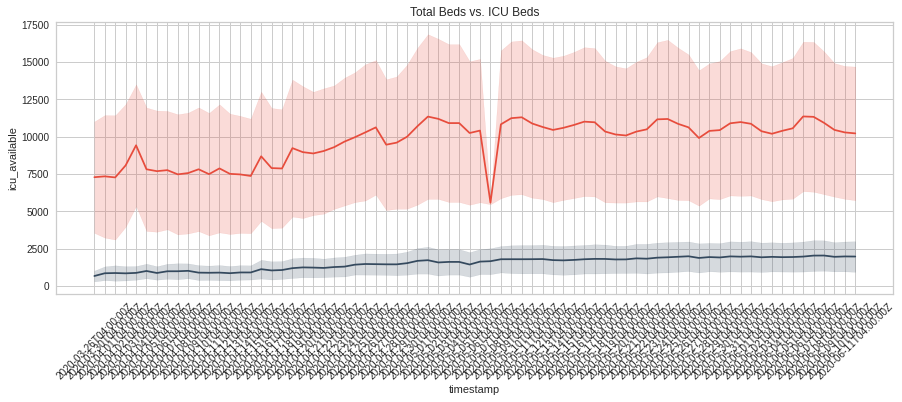

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x = 'timestamp', y = 'total_available' , data = beds, color=flatui[3])
sns.lineplot(x = 'timestamp', y = 'icu_available' , data = beds, color=flatui[4])
plt.xticks(rotation = 45)
plt.title('Total Beds vs. ICU Beds')
plt.show

In [ ]:
beds.head()

,timestamp,locality,total,total_available,icu,icu_available
0,2020-03-26T04:00:00Z,state,42566,11023,4330,1027
1,2020-03-26T04:00:00Z,nyc,20394,3557,2011,307
2,2020-03-30T04:00:00Z,state,44459,11453,5470,1309
3,2020-03-30T04:00:00Z,nyc,20898,3240,2449,392
4,2020-04-01T04:00:00Z,state,44921,11438,5740,1380


**CONSTAINT 3: DOCTORS**
* NYC DOCTORS: 19,146
* NY State: 73,299
* Every 100k: 375.1 (2018)
* ASSUMED THAT THERE ARE 20% MORE DOCTORS IN MANHATTAN 
* Doctor: Patient Ratio: 1:24 (INTENSIVIST) - ASSUMED ABOUT 10% OF MEDICAL DOCTORS
* REGULAR DOCTOR: 1:10 (Assumption)

In [ ]:
case_zip_group

,BOROUGH_GROUP,COVID_CASE_COUNT,POP_DENOMINATOR,COVID_DEATH_COUNT,TOTAL_COVID_TESTS,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,Bronx,45023,1434692.65,3621,161030,3151.142800,245.457600,27.522000,6441.200000
1,Brooklyn,54033,2582829.99,5190,236470,2061.754865,205.675135,22.545135,6391.081081
2,Manhattan,24394,1611943.49,2320,144415,1416.409318,127.868864,15.670909,3282.159091
3,Queens,61217,2288709.82,5182,224452,2592.678814,205.323898,25.974576,3804.271186
4,Staten Island,13474,476179.01,842,52504,2844.129167,167.073333,25.985000,4375.333333


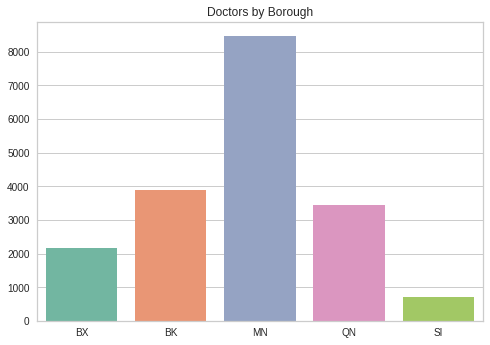

18641


In [ ]:
pop_boro = np.array(case_zip_group['POP_DENOMINATOR'])
weight_boro = [0.4,0.4,1.4,0.4,0.4]
doctors_est = pop_boro/100000*weight_boro*375.1
doctors_boro = [int(round(x)) for x in doctors_est]
sns.barplot(x = ['BX','BK','MN','QN','SI'], y = doctors_boro, palette = "Set2")
plt.title('Doctors by Borough')
plt.show()
print(sum(doctors_boro))

## HOSPITAL ADMISSIONS RATE
* This file includes the rate of visits to NYC emergency departments (ED) per 100,000 people
* Rates of subsequent admissions to the hospital through the ED, for influenza-like illness or pneumonia, by date of visit for all ages and by age group (0-17, 18-44, 45-64, 65-74, 75+ years), since February 1, 2020 based on the Health Department’s syndromic surveillance system.

In [ ]:
admission.head(5)

In [ ]:
admission_cum = admission
admission_cum=admission_cum.drop('Date',axis=1)
admission_cum=admission_cum.drop('Visit All ages',axis=1)
admission_cum=admission_cum.drop('Admit All ages',axis=1)
admission_cum

<function matplotlib.pyplot.show>

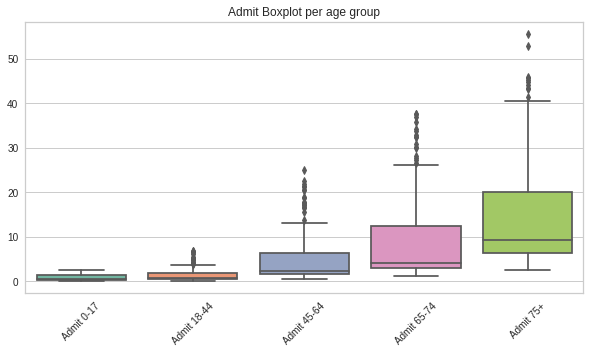

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(palette="Set2", data=admission_cum.iloc[:,0:5])
plt.xticks(rotation = 45)
plt.title('Admit Boxplot per age group')
plt.show

<function matplotlib.pyplot.show>

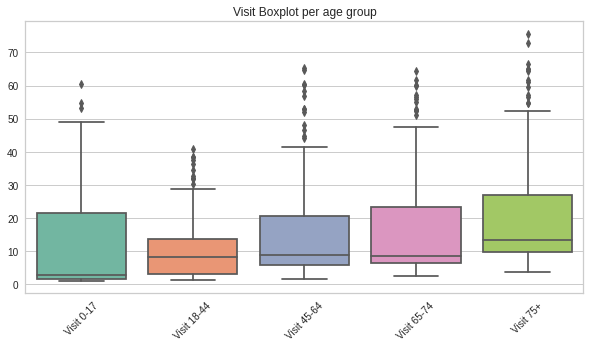

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(palette="Set2", data=admission_cum.iloc[:,5:])
plt.xticks(rotation = 45)
plt.title('Visit Boxplot per age group')
plt.show

In [ ]:
admission.mean()

Admit 0-17         0.745891
Admit 18-44        1.429411
Admit 45-64        5.447344
Admit 65-74        9.558529
Admit 75+         15.265780
Admit All ages     3.850442
Visit 0-17        12.649815
Visit 18-44       10.754383
Visit 45-64       15.955637
Visit 65-74       17.247355
Visit 75+         21.795198
Visit All ages    13.677209
dtype: float64

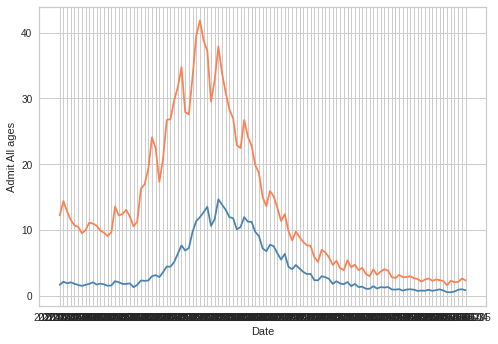

In [ ]:
#admission.tail(5)
#Visit all ages: 1.88 * Mahattan Population/100000 * manhatthan proportion
# HOW TO GET AN IDEA OF HOW MANY PEOPLE ARE IN THE MANHATTHAN HOSPITAL. 



fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Visit All ages', data=admission[admission['Date']>'2020-02-15'], color='coral')
sns.lineplot(x = 'Date', y = 'Admit All ages', data=admission[admission['Date']>'2020-02-15'], color = 'steelblue')
plt.show()


In [ ]:
#int(1611943.49/100000)
round(23624/1611943.49*100000)	#1375.302273(on Average)

1466

## RETRIEVE NUMBER OF DOCTORS + NURSES
* http://www.op.nysed.gov/prof/nurse/nursecounts.htm#
* 

In [ ]:
#prepare for python version 3x 
from __future__ import division, print_function

#import packages for web scraping/parsing

import requests #functions for interacting with web pages
from bs4 import BeautifulSoup ### DOM html manipulation
from string import whitespace
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize
from collections import Counter
import os
import re  
import string
from textblob import TextBlob

In [ ]:
title_list = list()
doc = list()
url_list = list()
most_common_list = list()
doc_list = list()

In [ ]:
def covid_doc_spider(max_pages): 
    page = 0
    while page <= max_pages:
        title_temp = list()
        url = 'https://www.nychealthandhospitals.org/doctors/page/' + str(page) + '/?doctor=Emergency%20Medicine&address&submit&specialty=1&sort_by&condition=1'
        source_code = requests.get(url)
        plain_text = source_code.text
        soup = BeautifulSoup(plain_text)
        views_field = soup.findAll('div','office_ad_info_doct_detl')
        for link in views_field:
            links = link.findAll('p')
            for x in links:
                doc_list.append(x.text)
        print(page)
        page += 1

In [ ]:
covid_doc_spider(100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [ ]:
number = [x[0] for x in enumerate(doc_list)]
address = [x[1] for x in enumerate(doc_list)]
zipcode = [x.split()[-4] for x in address]

In [ ]:
dict = {'number': number, 'address':address, 'zipcode':zipcode}
doctor_list = pd.DataFrame(dict)

In [ ]:
doctor_list.head()

,number,address,zipcode
0,0,NYC Health + Hospitals/Woodhull 760 Broadway B...,11206
1,1,NYC Health + Hospitals/Woodhull 760 Broadway B...,11206
2,2,NYC Health + Hospitals/Woodhull 760 Broadway B...,11206
3,3,NYC Health + Hospitals/Woodhull 760 Broadway B...,11206
4,4,NYC Health + Hospitals/Woodhull 760 Broadway B...,11206


In [ ]:
doc_list_group = doctor_list.groupby(zipcode).agg(count_by_zip = pd.NamedAgg("zipcode", "count"))

In [ ]:
doc_list_group['ppe_required'] = doc_list_group['count_by_zip'] * 152

In [ ]:
doc_list_group.head()

,count_by_zip,ppe_required
10016,129,19608
10029,42,6384
10037,62,9424
10451,106,16112
10461,80,12160


### FORECAST
#### In case we are doing forecast on covid19 cases
* https://www.youtube.com/watch?v=vW2LnlZR3sA - LOGISTIC
* https://www.youtube.com/watch?v=AnzKI9B6gII - PROPHET

website for PPEs:
https://www1.nyc.gov/office-of-the-mayor/news/316-20/test-trace-prepare-city-creates-stockpile-personal-protective-equipment
https://esd.ny.gov/sourcing-covid-19-products-nys

In [ ]:
#ventilators should be a 1:1 with the projected ICU

In [ ]:
#research on PPE for how much needed per doctor/nurse
#this shows that you need about 152 PPE for all staff per shift
# https://www.cdc.gov/vhf/ebola/healthcare-us/ppe/calculator.html

In [ ]:
#with the info above - just need to add 152 per day * #staff for each day (IF WE CAN ONLY FIND DOCTORS ITS 16 ppe PER DOC PER DAY / NURSES IS 40 PPE PER NURSE PER DAY)